# QOSF MENTORSHIP PROGRAM SCREENING TASK

# Table of Contents

* [0. Introduction](#chapter0)
* [1. Importing Packages](#chapter1)
* [2. Defning the Graph stucture](#chapter2)
* [3. Implementation of QAOA ](#chapter3)
    * [3.1 Initialize](#section_3_1)
    * [3.2 $U(C,\gamma)$](#section_3_2)
    * [3.3 $U(C,\beta)$](#section_3_3)
    * [3.4 Assembling the circuit](#section_3_4)
    * [3.5 Cost function](#section_3_5)
    * [3.6 Visualize](#section_3_6)
    * [3.7 Optimizizng the circuit params](#section_3_7)
* [4. Results](#chapter4)

# Instructions

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

>INSTRUCTIONS TO USE THE PACKAGE
>
>- The requirements needed to run this project are given the environment.yml file, It has few commented pip install packages which neds to be run seperately on command line **after installing conda packages** since their are some campatibilty issues.
<br>
>- Go inside the task4 folder
<br>
>- run command for veiwing all addional options ->> python main.py 
<br>
>- The optional parameters to customize :
    - -h, --help               show this help message and exit
    - -s SHOTS, --shots SHOTS  Set the number of shots
    - -d DEPTH, --depth DEPTH  Set the depth of the Quantum circuit
    - -n NUM, --num NUM        Set the number of qubits
    - -i ITER, --iter ITER     Set the number of iterations for optimal gamma and beta
    - -g GRAPH, --graph GRAPH  Select the type of graph

>IN CASE YOU CAN'T RUN THE PACKAGE, PLEASE CHECK THE SAMPLE OUTPUT IN sample_output.ipynb 

<br>
<br>

# 0. Introduction <a class="anchor" id="chapter0"></a>

<br>
This repository contains the solution of the task4 of QOSF mentorship program.

For this task we had to implement the QAOA algorithm for MaxCut problem the any weighted graph i.e. generalize/extend the idea of unwighted graph to weighted graphs. 
<br> <br>
The real challenge about the MaxCut probelm is that it comes under the class of problem which are of combinational complexity in nature when solved classically by the use of any turing machine.
<br>
Now according to the original paper the objetcive function for this set of classes- defined on bit string of size n- is :

<div align="center">
    $$ C(z) = \sum^m _{\alpha=1} C_{\alpha}(z)$$
</div>

Where $z = z1,z2,z3,..$ is the bit string and $C_{\alpha}(z) = 1$ if z satisfies clause $\alpha$ and $0$ if it doesn't.  
<br>

Since the Qauntum computers operate on a completely different paradigm, they can leverage the nature of physics at the fundamental levels to by pass this combinational limit and could potentially solve the problems under this category more efficiently.Here the authors have tried to demonstrate that very possiblity of solving the MaxCut problem by QAOA algorithm ( <a href="https://arxiv.org/pdf/1411.4028.pdf">original paper link</a> )
<br><br>
The background is to consider the graphs to be weighted and each vertex is a part of connected graph; The aim is to find a optimal cut or rather an arrangement of seperation in which the sum of weights connecting the opposite groups is maximal. Thus transforming the given general clause condition to suite our MaxCut problem, the unitary operator has been defined as 

<div>
    $$U(C,\gamma) = e^{-i \gamma C} = \prod_{\alpha=1}^m e^{-i\gamma C_{\alpha}}$$
</div>

The next operator b has been defined as :

<div>
    $$U(C,\beta) = e^{-i \beta B} =  \prod_{j=1}^m e^{-i\beta \sigma^x_{j}}$$
</div>

The idea behind using this is that, suppose that we use only $U(C,\gamma)$ then we might come across a state which is the eigen state after which we wouldn't be able to cross it, if the maximum state isn't this. Therefore we need a function which can help us gain momentum when trapped in such state (local maxima) if it hadn't been there our momentum would have been reduced to near zero value which would in fact prevent any more change in the value; this is analogous to having genetic mutations in genetic algorithms which is also used for the same purpose.
For this reason we prefer a unitary operator $U_B$ to commute with a $U_C$.
<br><br>

The initial state is usually prefered to be in superposition of all states, therefore the initial state can be given by:

<div>
$$\ket{s} = 1/\sqrt{2^n} \sum_z \ket{z}$$
</div>

We can now notice what we have actually achieved by expressing the MaxCut problem using Qubits. what we have essentialy done is reduce the problem from finding the optimal grapgh arrangement to finding the optimal values of $\beta$ and $\gamma$ which we can easily do using classical techniques such as classical optimizers or even grid search. Below is the same thing written mathematically (here p is the depth of the circuit or rather nmumber totterized states),   

<div>
$$\ket{\gamma,\beta} = U(B,\beta_p) U(C,\gamma_p)...U(B,\beta_1) U(C,\gamma_1) \ket{s}$$
</div>
<br>
Let the expectation value of clause C over $\gamma$ and $\beta$ be defnied by $F_p(\gamma,\beta)$ :

<div>
    $$F_p( \gamma , \beta ) = \bra{ \gamma , \beta }C\ket{ \gamma , \beta }$$
</div>
<br>
Then the maximum of $F_p(\gamma,\beta)$ is $M_p$:
<br>
<div>
   $$ M_p = max_{\gamma,\beta} F_p(\gamma,\beta) $$
</div>
<br>
They also show that the: 

<div>
    $$lim_{p->\infty}M_p = max_z C(z)$$
</div>
<br>

The above equation can be interpreted as if we were to use this approximate technique and do it infinite times then we would eventually reach the maximum state, This can be taken as an omen - We could say that this approximation is good enough for practical purposes. Also One observation to be noted here is that if p doesn't grow with n is then complexity is given by $O(m^2+mn)$ which means the complexity doesn't grow combinationally anymore. A simple grid search on $[0, 2\pi]^p x [0,\pi]^p$ would be enough.
<br>

Finally to extract the result from the obtained optimal $\gamma$ and $\beta$ is easy, we just have to know the corresponding bitstrings with highest probability which we get, it can then be used to get the grouping of vertices and logically the edges connecting opposites groups would be cut.    


<br>
This particular implementation has been adapted from the tutorial of Jack Ceroni on MaxCut for unwieghted graphs. ( <a href ="https://lucaman99.github.io/new_blog/2020/mar16.html">link to the tutorial </a>)

# 1. Importing Packages  <a class="anchor" id="chapter1"></a>

In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from matplotlib import pyplot as plt
%matplotlib inline
import networkx as nx
import random
from scipy.optimize import minimize
print("imports successful")

imports successful


# 2. Defning the Graph stucture  <a class="anchor" id="chapter2"></a>

We implement the graph and edge structure below. 

We are going to encode the graph in code by using the "edge list" implementation of graph


In [2]:
class Graph:
    def __init__(self, edges_set):
        self.edges_set = edges_set
        self.node_set = []
        for i in edges_set:
            if (i.start_node not in self.node_set):
                self.node_set.append(i.start_node)
            if (i.end_node not in self.node_set):
                self.node_set.append(i.end_node) 

class Edge:
    def __init__(self, start_node, end_node, weight = 1):
        self.start_node = start_node
        self.end_node = end_node
        self.weight = weight

Here we are making a random graph which will used for our demonstration of algorithm later.

Insturction to use the following edge_list struture: 

the Edge struture is given by:
    
    Edge(vertex 1, vertex 2, weight)
    
    Without the weight the default value will be taken to be 1. 


In [14]:
#triangle
#edge_list = [Edge(0,1,2), Edge(1,2,1), Edge(2,0,2)]
#square
#edge_list = [Edge(0,1,2), Edge(1,2,1), Edge(2,3,1), Edge(3,0,2)]
#cool graph
edge_list = [Edge(0, 1, 2), Edge(1, 2, 2), Edge(2, 3, 2), Edge(3,4), Edge(4,0), Edge(1,3), Edge(2,4)]

G = nx.Graph()

for z in edge_list:
    G.add_edge(str(z.start_node), str(z.end_node))

nx.draw(G)
plt.savefig('graph.png')
plt.clf()

<Figure size 432x288 with 0 Axes>

The graph: 

<div align="center">
    <img src ="./graph.png">
</div>

# 3. Implementation of MaxCut using QAOA  <a class="anchor" id="chapter3"></a> 

## 3.1 Initialize  <a class="anchor" id="section_3_1"></a>

Initialzing the qubits to equal superposition(all possible combinations would have equal probabilities)

In [15]:
def initialize(qc):
    for q in range(qc.num_qubits):
        qc.h(q)

## 3.2 $U(C,\gamma)$   <a class="anchor" id="section_3_2"></a>

Here we are enconding the weights of each edge to their corresponding qubits and this is how we model our graph into our circuit.

In [16]:
def cost_unitary(qc,gamma):
    for i in edge_list:
        qc.cu1(-2*gamma*i.weight, i.start_node, i.end_node)
        qc.u1(gamma*i.weight, i.start_node)
        qc.u1(gamma*i.weight, i.end_node)

## 3.3 $U(C,\beta)$  <a class="anchor" id="section_3_3"></a>

This helps us to recover from the local maximas that the algorithm might stumble upon

In [17]:
def mixer_unitary(qc, beta):
    for i in range(qc.num_qubits):
        qc.rx(2*beta, i)
    

# 3.4 Assembling the circuit  <a class="anchor" id="section_3_3"></a>

The previous blocks are now ready to be used to create the circuit and the results are passed to the cost function to calculate the total cost of the current circuit

In [18]:
def create_circuit(params, num, depth=2, shots=512):

    gamma = [params[0], params[2], params[4], params[6]]
    beta = [params[1], params[3], params[5], params[7]]

    qc = QuantumCircuit(num)
    initialize(qc)
    qc.barrier()
    for i in range(0, depth):
        cost_unitary(qc, gamma[i])
        qc.barrier()
        mixer_unitary(qc, beta[i])
    qc.measure_all()

    backend = Aer.get_backend('qasm_simulator')
    results = execute(qc,backend=backend,shots=shots).result()
    #print("results :: ", results.get_counts())
    
    return results.get_counts()

## 3.5 Cost function  <a class="anchor" id="section_3_5"></a>

The cost function is optimized based on the values of the beta and gamma i.e. it tries to find the optimal values of beta and gamma for which the cost of the circuit is maximal; This cost can be translated to the cost of optimal cut for our problem of MaxCut. The cost function is defined as following:
<div align="center">
<!--<img width=400 src="./images/cost_function.PNG">-->
    $$ H_c = \sum_{a,b} 1/2(Z_a \bigotimes Z_b - I)$$
</div>

where $a$ and $b$ are the different group by  each of the $Z_{i}$ is defined as:
<div align="center">
                            $f(x) = 1 - 2x$
</div>
<br>
where $x$ is each bit of bitstring generated for which we got the probabilities from the quantum circuit (this wqas done to map the bitstring values of 0 and 1 to 1 and -1)


In [19]:
def cost_function(params):

    qubit_count = create_circuit(params, num, depth, shots)
    print("qubit count :: ",qubit_count)
    bit_strings = list(qubit_count.keys())
    
    total_cost = 0
    
    for bit_string in bit_strings:
        each_bs_cost = 0
        bit_string_encoding = bit_string[::-1]
        for j in edge_list:
            #multiplying the whole equation by -1 so that later minize function from scipy can be used to optimize
            each_bs_cost += -1*0.5* j.weight *( 1 -( (1 - 2*int(bit_string_encoding[j.start_node])) * (1 - 2*int(bit_string_encoding[j.end_node])) ))
        #print("bit string freq :: ", qubit_count.get(bit_string))
        total_cost += each_bs_cost*qubit_count.get(bit_string)
        
    print("Cost: "+str(-1*total_cost/shots))

    return total_cost

## 3.6 Visualize  <a class="anchor" id="section_3_6"></a>

Visualizing the output using the matplotlib package

In [20]:
def visualize(f):
    # Creates visualization of the optimal state
    #curently here
    nums = []
    freq = []

    for k,v in f.items():
        number = 0
        #print("key :: ",k, " values :: ",v)
        for j in range(0, len(k)):
            number += 2**(len(k)-j-1)*int(k[j])
        if (number in nums):
            freq[nums.index(number)] = freq[nums.index(number)] + v
        else:
            nums.append(number)
            freq.append(v)

    freq = [s/sum(freq) for s in freq]

    print(nums)
    print(freq)

    x = range(0, 2**num)
    y = []
    for i in range(0, len(x)):
        if (i in nums):
            y.append(freq[nums.index(i)])
        else:
            y.append(0)

    plt.bar(x, y)
    plt.show()

## 3.7 Optimizizng the circuit params  <a class="anchor" id="section_3_7"></a>

Till now we have successfully transformed the given MaxCut problem into an optimization problem over $\beta$ and $\gamma$.

We use a classical optimizer COBYLA to go over the possible combination for them

Ultimately we achieve a list of bitstrings with their probabilities, among them the two bitstring with highest probabilities will constitute our solution. These bitstring are actually complementary of each other meaning if you reverse one of their bit mappings i.e. 0->1 and 1->0 you'll get the other string. They canm be directly translated into our solution by using the following key: 
<br>
<div align="center">
                 for every $i$th vertex, it belongs to the group which is at the $i$th place in the bitstring
</div>

qubit count ::  {'00000': 56, '00001': 4, '10000': 19, '10001': 27, '10010': 7, '10011': 42, '10100': 35, '10101': 60, '10110': 15, '10111': 4, '11000': 55, '11001': 52, '11010': 15, '11011': 15, '11100': 37, '11101': 58, '11110': 4, '11111': 66, '00010': 59, '00011': 39, '00100': 15, '00101': 11, '00110': 43, '00111': 58, '01000': 13, '01001': 19, '01010': 48, '01011': 46, '01100': 46, '01101': 9, '01110': 33, '01111': 14}
Cost: 4.7470703125
qubit count ::  {'00000': 57, '00001': 32, '10000': 36, '10001': 2, '10010': 33, '10011': 63, '10100': 19, '10101': 54, '10110': 3, '10111': 24, '11001': 26, '11010': 25, '11011': 59, '11100': 48, '11101': 7, '11110': 45, '11111': 66, '00010': 6, '00011': 53, '00100': 74, '00101': 37, '00110': 36, '00111': 1, '01000': 29, '01001': 4, '01010': 49, '01011': 13, '01100': 66, '01101': 28, '01111': 29}
Cost: 4.63671875
qubit count ::  {'00000': 22, '00001': 24, '10000': 21, '10010': 6, '10011': 28, '10100': 28, '10101': 1, '10110': 8, '10111': 71, '110

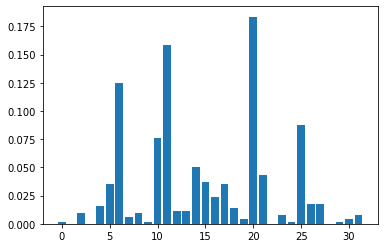

In [23]:
def do_max_cut():
    
    # Defines the optimization method
    init =[float(random.randint(-314, 314))/float(100) for i in range(0, 8)]
    out = minimize(cost_function, x0=init, method="COBYLA", options={'maxiter':2000})
    print(out)

    optimal_params = out['x']
    f = create_circuit(optimal_params, num, depth)
    #print(f)
    visualize(f)
    
    return


shots = 1024
depth = 2
num = 5
do_max_cut()

# 4. Results  <a class="anchor" id="chapter4"></a>

For this particular example we notice that the highest probabilities are achieved for the mapping 20(10100) and 11(01011). 

we can see they complement each other; they are, in fact, one solution itself. Here we use the mappings of 13 (01101) :


| Vertex | Label    |
|--------|----------|
| 4      | 1        |
| 3      | 0        |
| 2      | 1        |
| 1      | 0        |
| 0      | 0        |


The final cost of the cutting this graph into the this arrangement is 8.

8 is the value for which we obtain the MaxCut when done manually as well, thus we can say that the QAOA works as expected.